# Running Bar Graph 
### of number of cases of covid-19 across the world from 24th Feb to 18th April

---

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.colors as mc
import colorsys
from random import randint
import re

In [2]:
df = pd.read_csv('./country_data.csv',keep_default_na=False)

dateList = df.Date.unique()
dateList.sort()
dateList = dateList[33:] #24th Feb to 18th April

df.sort_values(by='Date', ascending=True).head(10)

,Place,Date,Confirmed,Deaths,Recovered
6049,Japan,2020-01-22,2,0,0
6048,China,2020-01-22,547,17,28
6047,South Korea,2020-01-22,1,0,0
6046,Thailand,2020-01-22,2,0,0
6045,US,2020-01-22,1,0,0
6044,Taiwan,2020-01-22,1,0,0
6043,Macau,2020-01-22,1,0,0
6042,Hong Kong,2020-01-22,0,0,0
6030,Vietnam,2020-01-23,2,0,0
6026,Hong Kong,2020-01-23,2,0,0


In [3]:
def transform_color(color, amount = 0.5):

    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = df['Place'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]

In [6]:
def draw_barchart(myDate):
    dff = (df[df['Date'].eq(myDate)]
       .sort_values(by='Confirmed', ascending=True)
       .tail(10))
    ax.clear()
    
    normal_colors = dict(zip(df['Place'].unique(), rgb_colors_opacity))
    dark_colors = dict(zip(df['Place'].unique(), rgb_colors_dark))
    
    y_pos = list(range(0, len(dff)))
    ax.barh(y_pos,dff['Confirmed'],color = [normal_colors[x] for x in dff['Place']],
            edgecolor =([dark_colors[x] for x in dff['Place']]))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(' ')
    for i, (Confirmed, Place) in enumerate(zip(dff['Confirmed'], dff['Place'])):
        ax.text(Confirmed, i,Confirmed,size=14, weight=600, ha='left', va='center')   # 38194.2: value
        ax.text(Confirmed, i,Place,size=14, ha='right',  va='center')  # Tokyo: name
    
    temp = myDate.split("-")
    day = int(temp[2])
    month = ''
    if temp[1] == '02':
        month = 'February'
    elif temp[1] == '03':
        month = 'March'
    else:
        month = 'April'
    t = str(day) + " " + month
    ax.text(1, 0.4, t, transform=ax.transAxes, size=46, ha='right')
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The Spread of COVID-19 across the world from 24 Feb to 18 April',
            transform=ax.transAxes, size=20, weight=400, ha='left')
    ax.margins(0, 0.01)
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.text(0, 1.06, 'Number of Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')

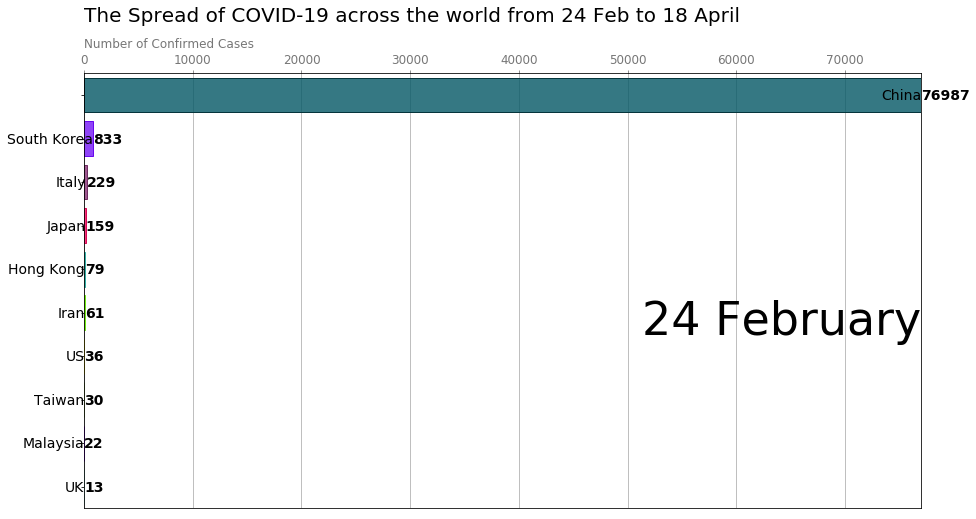

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=dateList)
HTML(animator.to_jshtml())